In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=aa18969efb5fc62ada6a5e33aa1a29e7ad3e1f84af20ce4149f4b6c997affc9a
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import yfinance as yf
import pandas as pd
import ta  # For technical indicators

# Fetch NVIDIA stock data
ticker = "NVDA"
data = yf.download(ticker, start="2023-01-01", end="2023-12-31", interval="1d")

# Ensure data is properly formatted
data = data.dropna()

# Squeeze DataFrame columns to ensure they're one-dimensional
close_prices = data["Close"].squeeze()
high_prices = data["High"].squeeze()
low_prices = data["Low"].squeeze()
volume = data["Volume"].squeeze()

# Add OBV (On-Balance Volume)
obv_indicator = ta.volume.OnBalanceVolumeIndicator(close=close_prices, volume=volume)
data["OBV"] = obv_indicator.on_balance_volume()

# Add AD (Accumulation/Distribution Line)
ad_indicator = ta.volume.AccDistIndexIndicator(high=high_prices, low=low_prices, close=close_prices, volume=volume)
data["AD"] = ad_indicator.acc_dist_index()

# Add ADX (Average Directional Index)
adx_indicator = ta.trend.ADXIndicator(high=high_prices, low=low_prices, close=close_prices, window=14)
data["ADX"] = adx_indicator.adx()

# Add MACD (Moving Average Convergence Divergence)
macd_indicator = ta.trend.MACD(close=close_prices)
data["MACD"] = macd_indicator.macd()
data["MACD_Signal"] = macd_indicator.macd_signal()
data["MACD_Diff"] = macd_indicator.macd_diff()

# Add RSI (Relative Strength Index)
rsi_indicator = ta.momentum.RSIIndicator(close=close_prices, window=14)
data["RSI"] = rsi_indicator.rsi()

# Add Stochastic Oscillator (Stoch)
stoch_indicator = ta.momentum.StochasticOscillator(high=high_prices, low=low_prices, close=close_prices, window=14, smooth_window=3)
data["Stoch_K"] = stoch_indicator.stoch()
data["Stoch_D"] = stoch_indicator.stoch_signal()

# Print the processed data
print(data.tail())

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          NVDA       NVDA       NVDA       NVDA   
Date                                                                    
2023-12-22 00:00:00+00:00  48.819527  48.830002  49.382999  48.466999   
2023-12-26 00:00:00+00:00  49.268425  49.278999  49.599998  48.959999   
2023-12-27 00:00:00+00:00  49.406395  49.417000  49.680000  49.084999   
2023-12-28 00:00:00+00:00  49.511375  49.521999  49.883999  49.411999   
2023-12-29 00:00:00+00:00  49.511375  49.521999  49.997002  48.750999   

Price                           Open     Volume          OBV            AD  \
Ticker                          NVDA       NVDA                              
Date                                                                         
2023-12-22 00:00:00+00:00  49.195000  252507000  18459737000  1.015929e+10   
2023-12-26 00:00:00+00:00  48.967999  244200000  18703937000  1.015853e+10   
2023-12-27 00:00:00+00:00

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ADF Statistic: -1.7068635085716424
p-value: 0.42757970550795527
Data is not stationary


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:                   NVDA   No. Observations:                  200
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -101.555
Date:                Sat, 16 Nov 2024   AIC                            223.110
Time:                        23:39:52   BIC                            256.043
Sample:                             0   HQIC                           236.439
                                - 200                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Open_NVDA      -0.6978   6.49e-19  -1.07e+18      0.000      -0.698      -0.698
High_NVDA       0.7757   7.19e-19   1.08e+18      0.000       0.776       0.776
Low_NVDA        0.7507   5.15e-19   1.46e+18    

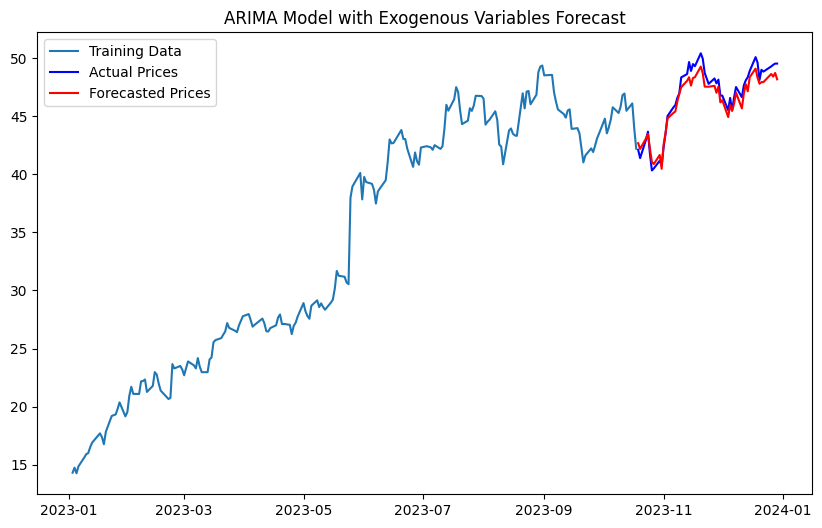

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Download historical data for NVDA
nvda_data = yf.download('NVDA', start='2023-01-01', end='2023-12-31')

# Use the 'Close' column for prediction
close_prices = nvda_data['Close']

# Test for stationarity (ADF Test)
def test_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

test_stationarity(close_prices)

# Differencing if the data is not stationary
close_prices_diff = close_prices.diff().dropna()

# Split the data into training and testing datasets (80/20 split)
train_size = int(len(close_prices) * 0.8)
train_data, test_data = close_prices[:train_size], close_prices[train_size:]

# Use 'Open', 'High', 'Low', 'Volume' as exogenous variables
exog_train = nvda_data[['Open', 'High', 'Low', 'Volume']].iloc[:train_size]
exog_test = nvda_data[['Open', 'High', 'Low', 'Volume']].iloc[train_size:]

# Fit the ARIMA model with exogenous variables (External regressors)
model = ARIMA(train_data, order=(5, 1, 0), exog=exog_train)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Make forecast with the test data (including exogenous variables for the forecast period)
forecast = model_fit.forecast(steps=len(test_data), exog=exog_test)

# Plotting the forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(test_data.index, forecast, label='Forecasted Prices', color='red')
plt.legend()
plt.title('ARIMA Model with Exogenous Variables Forecast')
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.4990e-04
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 3.4199e-05
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 2.9435e-05
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 2.4641e-05
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 2.5401e-05
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 3.2474e-05
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 3.1373e-05
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 1.9970e-05
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 3.1455e-05
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 2.2927e-05
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Mean Absolute Error: 3.294538694612045
Mean Squared Error: 26.365255478989592


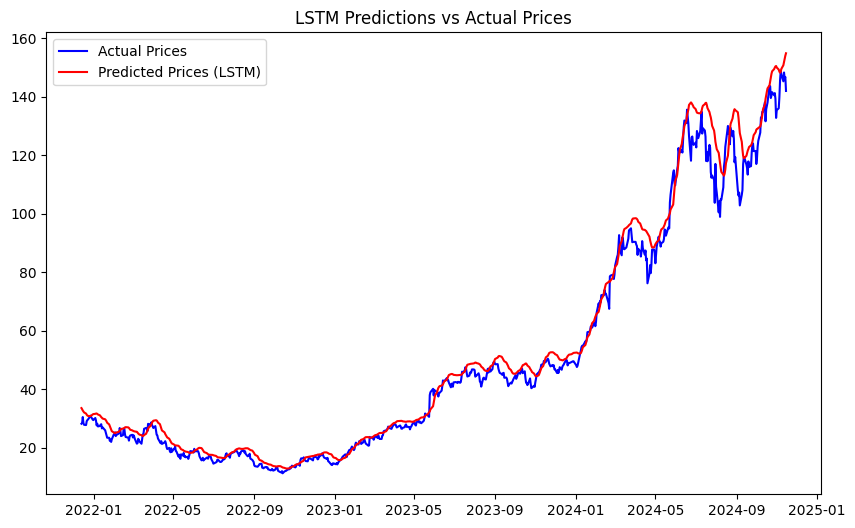

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Download historical stock data for NVDA
nvda_data = yf.download('NVDA', start='2010-01-01', end='2024-11-16')

# Use 'Close' prices for prediction
data = nvda_data[['Close']]

# Normalize the data using MinMaxScaler (scales data between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences of data
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Use past 'time_step' days as features
        y.append(data[i, 0])  # Predict the 'Close' price of the next day
    return np.array(X), np.array(y)

# Create sequences for the data
time_step = 60  # Use the past 60 days to predict the next day's price
X, y = create_sequences(scaled_data, time_step)

# Split the data into training and testing sets (80/20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM (LSTM expects 3D input: [samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model
model = Sequential()

# Add the LSTM layer (units can be tuned)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer (predict next day's 'Close' price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get actual price
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model performance
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(nvda_data.index[train_size + time_step:], y_test_actual, label='Actual Prices', color='blue')
plt.plot(nvda_data.index[train_size + time_step:], y_pred_actual, label='Predicted Prices (LSTM)', color='red')
plt.legend()
plt.title('LSTM Predictions vs Actual Prices')
plt.show()
